## data wargling(joining)
- df.merge()
- df.join()
- df.concat()

## groupby
## handling missing values

In [2]:
import numpy as np
import pandas as pd

In [3]:
df1 =  pd.DataFrame({"cnic": np.random.randint(1,20, size = 20),
                    "acc": np.random.randint(1,5, size = (20)),
                    })
df1

,cnic,acc
0,7,2
1,5,4
2,8,1
3,1,3
4,3,2
5,4,1
6,8,2
7,10,3
8,17,4
9,15,2


In [4]:
df2 =  pd.DataFrame({"cnic": np.random.randint(1,20, size = 20),
                    "acc": np.random.randint(1,5, size = 20),
                    "mob_no": np.random.randint(2000334,3345645, size = 20),
                    "DOB":pd.date_range("1998-01-01", periods=20, freq="Y"),
                    "name": [chr(x) for x in np.random.randint(65,91, size = 20)],
                    "gender": np.random.choice(["M", "F"], size = 20)
                    })
df2

,cnic,acc,mob_no,DOB,name,gender
0,6,1,2194313,1998-12-31,U,F
1,14,1,2688528,1999-12-31,U,F
2,9,1,2041140,2000-12-31,Y,F
3,13,4,2586386,2001-12-31,W,F
4,1,1,2844069,2002-12-31,M,F
5,12,1,2018996,2003-12-31,W,F
6,3,1,3322137,2004-12-31,J,M
7,11,2,2838393,2005-12-31,B,F
8,17,4,2498991,2006-12-31,M,M
9,1,4,2380293,2007-12-31,O,F


In [10]:
#data_frame_left.merge(dataframe_right, on = "colom name same in both", how = "type of join")
#type of join = inner, outer, left, right

#data_frame_left.merge(dataframe_right, on = [col1, col2, col3], how = "type of join")

#if column name different in both tables

#data_frame_left.merge(dataframe_right, left_on = "col", right_on = "col", how = "type of join")
#data_frame_left.merge(dataframe_right, left_index = True, right_index = False, how = "type of join")


In [5]:
#datatype and pattern should be same for PK in both tables

print(df1.dtypes, df2.dtypes, sep = "\n\n\n")

cnic    int32
acc     int32
dtype: object


cnic               int32
acc                int32
mob_no             int32
DOB       datetime64[ns]
name              object
gender            object
dtype: object


In [6]:
#data_frame_left.merge(dataframe_right, on = "colom name same in both", how = "type of join")
a = df1.merge(df2, on="cnic", how="inner") #return only those rows having same cnic values in both
a

,cnic,acc_x,acc_y,mob_no,DOB,name,gender
0,7,2,4,3325477,2013-12-31,C,F
1,7,2,1,2101708,2017-12-31,L,F
2,1,3,1,2844069,2002-12-31,M,F
3,1,3,4,2380293,2007-12-31,O,F
4,1,3,1,3039006,2012-12-31,A,M
5,3,2,1,3322137,2004-12-31,J,M
6,17,4,4,2498991,2006-12-31,M,M
7,17,4,3,3304599,2008-12-31,W,F
8,17,4,3,2590207,2009-12-31,F,F
9,15,2,4,2319263,2014-12-31,W,M


In [7]:
#data_frame_left.merge(dataframe_right, on = [col1, col2, col3], how = "type of join")
a = df1.merge(df2, on= ["cnic", "acc"], how = "inner") #return only those rows having same cnic and acc values
a

,cnic,acc,mob_no,DOB,name,gender
0,17,4,2498991,2006-12-31,M,M
1,9,1,2041140,2000-12-31,Y,F


In [64]:
df1.columns

Index(['cnic', 'acc'], dtype='object')

In [65]:
df1.columns = ['Cust_CNIC', 'account_no'] #updated col names
df1.head(2)

,Cust_CNIC,account_no
0,14,3
1,6,4


In [66]:
df2.columns

Index(['cnic', 'acc', 'mob_no', 'DOB', 'name', 'gender'], dtype='object')

### if column name different in both tables

#### data_frame_left.merge(dataframe_right, left_on = "col", right_on = "col", how = "type of join")

In [67]:
a = df1.merge(df2, left_on="Cust_CNIC", right_on="cnic") #how = inner by default
a

,Cust_CNIC,account_no,cnic,acc,mob_no,DOB,name,gender
0,14,3,14,3,2413585,2001-12-31,M,M
1,2,4,2,1,2341623,1998-12-31,G,M
2,2,3,2,1,2341623,1998-12-31,G,M
3,13,3,13,4,3086458,1999-12-31,H,F
4,13,3,13,1,2445822,2014-12-31,R,M
5,12,3,12,2,2080382,2002-12-31,N,M
6,8,4,8,1,3041125,2007-12-31,E,M
7,8,4,8,4,2487232,2008-12-31,S,M
8,3,1,3,4,2769068,2004-12-31,M,M
9,3,1,3,4,2939473,2013-12-31,S,F


In [68]:
a = df1.merge(df2, left_on=["Cust_CNIC", "account_no"], right_on=["cnic", "acc"]) #how = inner by default
a

,Cust_CNIC,account_no,cnic,acc,mob_no,DOB,name,gender
0,14,3,14,3,2413585,2001-12-31,M,M
1,8,4,8,4,2487232,2008-12-31,S,M


### join with index

In [75]:
customers = pd.DataFrame({"CNIC": [11,22,33], "name":["A","B","C"]})

transactions = pd.DataFrame({"cnic": np.random.choice([14,6,19,11,33,5,22,8,7,6], size = 20),
                             "trans_ID": np.random.randint(1,2, size = 20),
                             "trans_Date": pd.date_range("1990-01-01", periods=20),
                             "description": np.random.choice(["M","F"], size=20)
                            })
customers

,CNIC,name
0,11,A
1,22,B
2,33,C


In [76]:
transactions

,cnic,trans_ID,trans_Date,description
0,5,1,1990-01-01,F
1,19,1,1990-01-02,F
2,22,1,1990-01-03,F
3,6,1,1990-01-04,M
4,11,1,1990-01-05,F
5,8,1,1990-01-06,F
6,14,1,1990-01-07,M
7,8,1,1990-01-08,M
8,6,1,1990-01-09,F
9,8,1,1990-01-10,F


In [77]:
customers.merge(transactions, left_on="CNIC", right_on="cnic" )

,CNIC,name,cnic,trans_ID,trans_Date,description
0,11,A,11,1,1990-01-05,F
1,11,A,11,1,1990-01-15,F
2,22,B,22,1,1990-01-03,F
3,22,B,22,1,1990-01-13,F
4,22,B,22,1,1990-01-19,M


In [78]:
c = transactions.cnic.value_counts()
c

6     5
22    3
8     3
7     3
11    2
5     2
19    1
14    1
Name: cnic, dtype: int64

In [84]:
transactions.cnic.value_counts().index

Int64Index([6, 22, 8, 7, 11, 5, 19, 14], dtype='int64')

In [80]:
transactions.cnic.value_counts().values

array([5, 3, 3, 3, 2, 2, 1, 1], dtype=int64)

In [87]:
a = customers.merge(c, left_on="CNIC", right_index=True)
a

,CNIC,name,cnic
0,11,A,2
1,22,B,3


In [30]:
a.columns

Index(['CNIC', 'name', 'cnic'], dtype='object')

In [31]:
a.columns = ['CNIC', 'name', 'trans counts']
a

,CNIC,name,trans counts
0,14,A,1
1,6,B,2
2,19,C,8


In [37]:
customers.join??

In [8]:
df1 =  pd.DataFrame({"cnic": np.random.randint(1,20, size = 5),
                    "acc": np.random.randint(1,5, size = (5)),
                    })
df2 =  pd.DataFrame({"cnic": np.random.randint(1,20, size = 20),
                    "acc": np.random.randint(1,5, size = 20),
                    "mob_no": np.random.randint(2000334,3345645, size = 20),
                    "DOB":pd.date_range("1998-01-01", periods=20),
                    "name": [chr(x) for x in np.random.randint(65,91, size = 20)],
                    "gender": np.random.choice(["M", "F"], size = 20)
                    })
display(df1)
df2

,cnic,acc
0,11,4
1,5,4
2,15,2
3,9,1
4,18,1


,cnic,acc,mob_no,DOB,name,gender
0,15,4,2481460,1998-01-01,M,M
1,16,3,2889862,1998-01-02,O,M
2,11,4,2001627,1998-01-03,L,M
3,19,1,2320610,1998-01-04,U,F
4,12,2,3198368,1998-01-05,V,M
5,13,4,3216820,1998-01-06,X,M
6,15,2,2447578,1998-01-07,Z,M
7,10,1,2702131,1998-01-08,C,M
8,16,3,2706224,1998-01-09,R,M
9,2,4,2011787,1998-01-10,M,F


In [9]:
df1.join(df2, on = "cnic", how = "left", lsuffix = "_df1")

,cnic_df1,acc_df1,cnic,acc,mob_no,DOB,name,gender
0,11,4,11,1,2605522,1998-01-12,W,M
1,5,4,13,4,3216820,1998-01-06,X,M
2,15,2,4,3,2086603,1998-01-16,V,F
3,9,1,2,4,2011787,1998-01-10,M,F
4,18,1,16,1,2361400,1998-01-19,V,M


In [10]:
df1.merge(df2, on = "cnic", how = "left")

,cnic,acc_x,acc_y,mob_no,DOB,name,gender
0,11,4,4.0,2001627.0,1998-01-03,L,M
1,11,4,1.0,2605522.0,1998-01-12,W,M
2,5,4,2.0,2669492.0,1998-01-18,M,M
3,5,4,3.0,2407712.0,1998-01-20,J,F
4,15,2,4.0,2481460.0,1998-01-01,M,M
5,15,2,2.0,2447578.0,1998-01-07,Z,M
6,9,1,1.0,2126050.0,1998-01-15,L,F
7,18,1,NaN,NaN,NaT,NaN,NaN


In [58]:
df1.merge(df2, on = "cnic", how = "inner")

,cnic,acc_x,acc_y,mob_no,DOB,name,gender
0,12,1,2,2930242,2010-12-31,M,F
1,6,1,4,2131233,2015-12-31,I,F
2,18,1,3,3181996,1999-12-31,S,F
3,18,1,4,2407282,2001-12-31,N,M


In [64]:
df1.merge(df2, on = "cnic", how = "outer")

,cnic,acc_x,acc_y,mob_no,DOB,name,gender
0,12,1.0,2.0,2930242.0,2010-12-31,M,F
1,6,1.0,4.0,2131233.0,2015-12-31,I,F
2,16,4.0,NaN,NaN,NaT,NaN,NaN
3,18,1.0,3.0,3181996.0,1999-12-31,S,F
4,18,1.0,4.0,2407282.0,2001-12-31,N,M
5,17,1.0,NaN,NaN,NaT,NaN,NaN
6,10,NaN,4.0,2386312.0,1998-12-31,T,F
7,10,NaN,1.0,2111497.0,2009-12-31,D,F
8,10,NaN,3.0,2539594.0,2013-12-31,M,M
9,8,NaN,2.0,2605824.0,2000-12-31,R,M


In [65]:
df1.merge(df2, on = ["cnic","acc"], how = "outer")

,cnic,acc,mob_no,DOB,name,gender
0,12,1,NaN,NaT,NaN,NaN
1,6,1,NaN,NaT,NaN,NaN
2,16,4,NaN,NaT,NaN,NaN
3,18,1,NaN,NaT,NaN,NaN
4,17,1,NaN,NaT,NaN,NaN
5,10,4,2386312.0,1998-12-31,T,F
6,18,3,3181996.0,1999-12-31,S,F
7,8,2,2605824.0,2000-12-31,R,M
8,18,4,2407282.0,2001-12-31,N,M
9,1,4,3132002.0,2002-12-31,P,F


In [96]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})

right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                               'key2': ['one', 'one', 'one', 'two'],
                               'rval': [4, 5, 6, 7]})
display(left, right)

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [107]:
left.merge(right, on=["key1","key2"])

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,bar,one,3,6


In [108]:
left.merge(right, on=["key1","key2"], how="left")

,key1,key2,lval,rval
0,foo,one,1,4.0
1,foo,one,1,5.0
2,foo,two,2,NaN
3,bar,one,3,6.0


In [116]:
left.merge(right, on=["key1","key2"], how="right")

,key1,key2,lval,rval
0,foo,one,1.0,4
1,foo,one,1.0,5
2,bar,one,3.0,6
3,bar,two,NaN,7


# group by

In [ ]:
#dataframe.groupby(by="").agg(min,max,count....)
#dataframe.groupby(by=[c1,c2,c3]).agg(min,max,count....)
e.g:
    how many male/female--> groupby gender
    how many transactions per cust--> groupby cnic
    how many transactions per M or Y
    multiple col e.g:
        trend of M and F transactions per year(year, gender)
        how many transactions by any customers yearly
        how many transactions by unique customers yearly
slab is category of data

In [13]:
df2["actual amount"] = np.random.randint(1,10000, size=20)
df2

,cnic,acc,mob_no,DOB,name,gender,actual amount
0,15,4,2481460,1998-01-01,M,M,8813
1,16,3,2889862,1998-01-02,O,M,7144
2,11,4,2001627,1998-01-03,L,M,1926
3,19,1,2320610,1998-01-04,U,F,2992
4,12,2,3198368,1998-01-05,V,M,9315
5,13,4,3216820,1998-01-06,X,M,2758
6,15,2,2447578,1998-01-07,Z,M,795
7,10,1,2702131,1998-01-08,C,M,713
8,16,3,2706224,1998-01-09,R,M,4644
9,2,4,2011787,1998-01-10,M,F,1950


In [14]:
c = df2.groupby("gender").agg("count")
c

,cnic,acc,mob_no,DOB,name,actual amount
gender,,,,,,
F,9,9,9,9,9,9
M,11,11,11,11,11,11


In [15]:
c = df2.groupby("gender")[["cnic"]].agg(["count", "sum"])
c

cnic     
       count  sum
gender           
F          9   74
M         11  140

In [16]:
df2.groupby([df2["DOB"].dt.year,"gender"])[["cnic"]].agg(["count"])

cnic
            count
DOB  gender      
1998 F          9
     M         11

In [17]:
df2.groupby(["gender", "acc", "cnic"])[["cnic"]].agg(["count"])

cnic
                count
gender acc cnic      
F      1   9        1
           19       1
       2   4        1
       3   4        2
           5        1
       4   2        1
           10       1
           17       1
M      1   10       1
           11       1
           16       1
       2   5        1
           12       1
           15       1
       3   16       2
       4   11       1
           13       1
           15       1

In [18]:
a = df2.groupby(["gender", "acc", "cnic"])[["actual amount"]].agg(["count","sum"])
a

actual amount       
                        count    sum
gender acc cnic                     
F      1   9                1   8771
           19               1   2992
       2   4                1   4176
       3   4                2  11441
           5                1   5307
       4   2                1   1950
           10               1   7582
           17               1   6142
M      1   10               1    713
           11               1   2917
           16               1   1333
       2   5                1   4502
           12               1   9315
           15               1    795
       3   16               2  11788
       4   11               1   1926
           13               1   2758
           15               1   8813

In [19]:
a.columns

MultiIndex(levels=[['actual amount'], ['count', 'sum']],
           codes=[[0, 0], [0, 1]])

In [26]:
a.columns[0][1]

'count'

In [28]:
a['actual amount'].sum()

count       20
sum      93221
dtype: int64

In [170]:
a['actual amount']["sum"].sum() #df2["actual amount"].sum()

97709

actual amount                   
                   count    sum   min   max
gender acc                                 
F      2               2  10429  4549  5880
       3               2  12670  6017  6653
       4               4  16182  3128  5473
M      1               2   7409  3459  3950
       2               4  19118   411  7771
       3               3   9629   413  8393
       4               3  22272  3760  9577

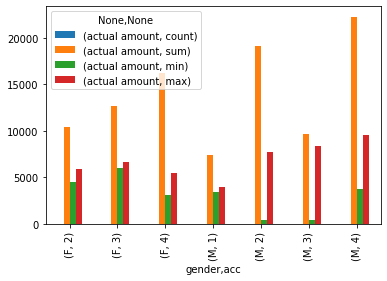

In [184]:
p = df2.groupby(["gender","acc"])[["actual amount"]].agg(["count", "sum","min","max"])
p.plot(kind = "bar")
p

# Binning

# cut()

# qcut()

* to make slabs

In [192]:
pd.cut(df2["actual amount"],2)

0      (4883.5, 9627.0]
1     (130.513, 4883.5]
2     (130.513, 4883.5]
3     (130.513, 4883.5]
4      (4883.5, 9627.0]
5     (130.513, 4883.5]
6      (4883.5, 9627.0]
7      (4883.5, 9627.0]
8     (130.513, 4883.5]
9      (4883.5, 9627.0]
10     (4883.5, 9627.0]
11     (4883.5, 9627.0]
12    (130.513, 4883.5]
13     (4883.5, 9627.0]
14    (130.513, 4883.5]
15    (130.513, 4883.5]
16    (130.513, 4883.5]
17    (130.513, 4883.5]
18     (4883.5, 9627.0]
19    (130.513, 4883.5]
Name: actual amount, dtype: category
Categories (2, interval[float64]): [(130.513, 4883.5] < (4883.5, 9627.0]]

In [202]:
pd.cut(df2["actual amount"],4).value_counts()

(2702.5, 4994.0]     8
(4994.0, 7285.5]     5
(7285.5, 9577.0]     4
(401.834, 2702.5]    3
Name: actual amount, dtype: int64

In [205]:
pd.cut(df2["actual amount"],[1,2000,4000,6000,8000,10000]).value_counts()

(2000, 4000]     6
(6000, 8000]     4
(4000, 6000]     4
(8000, 10000]    3
(1, 2000]        3
Name: actual amount, dtype: int64

In [207]:
pd.qcut(df2["actual amount"],[0, 0.3, 0.7, 1]).value_counts()

(3669.7, 6207.8]     8
(6207.8, 9577.0]     6
(410.999, 3669.7]    6
Name: actual amount, dtype: int64

In [205]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

#right inclusive

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [203]:
cats.value_counts()#pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [194]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

# handling missing values

## filter out missing data

- df.isna/ isnull
- notna/ notnull
- df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

## filling in missing data

- df.fillna(value=None, method=None,axis=None, inplace=False,limit=None,)
- df.bfill(axis=0, inplace=False, limit=None)
- df.ffill()

## duplicates

- df.duplicated(subset=None, keep='first') ->check duplicates
- df.drop_duplicates(subset=None, keep='first', inplace=False)

## replace 

- df.replace(
    to_replace=None,
    value=None,
    inplace=False,
    limit=None,
    method=,
) --> scalar, lists, dic, dic of dic can be passed

In [10]:
s = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
s

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [11]:
s.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [12]:
s.dropna() #inline operation

0     aardvark
1    artichoke
3      avocado
dtype: object

In [20]:
s.notna()  #s.notnull

0     True
1     True
2    False
3     True
dtype: bool

In [21]:
s[s.notnull()]

0     aardvark
1    artichoke
3      avocado
dtype: object

In [103]:
from numpy import nan as NA

data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [104]:
data[data.notnull()] # /notna()

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [105]:
data.dropna()  #drop all rows having nulls #inline

,0,1,2
0,1.0,6.5,3.0


In [106]:
data.dropna(how="all") #drop row that is all null

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [107]:
data[4] = np.nan
data.dropna(how="all", axis=1) #drop col that is all null

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [29]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = np.nan
df.iloc[:2,2] = np.nan
df.iloc[0,0] = np.nan
df

,0,1,2
0,NaN,NaN,NaN
1,0.281588,NaN,NaN
2,0.642793,NaN,0.432489
3,0.696755,NaN,-0.580989
4,0.072278,-0.088540,1.314465
5,0.855547,1.540231,0.617316
6,0.699211,-0.474273,2.379556


In [33]:
df.dropna() #drop all rows having any NA but u want to keep 2 such value containing records
df.dropna(thresh=2) #Keep only the rows with at least 2 non-null values.

,0,1,2
2,0.642793,NaN,0.432489
3,0.696755,NaN,-0.580989
4,0.072278,-0.088540,1.314465
5,0.855547,1.540231,0.617316
6,0.699211,-0.474273,2.379556


In [112]:
df.dropna(subset=[0,2], inplace=True) # inplace makes inmemory changes
df

,0,1,2
2,-1.200705,NaN,-1.234654
3,-0.726321,NaN,0.361483
4,0.031187,-0.893710,-1.632142
5,0.283049,1.693602,2.244801
6,0.086018,0.552677,0.306461


## filling in missing data

In [113]:
df.fillna(0)

,0,1,2
2,-1.200705,0.000000,-1.234654
3,-0.726321,0.000000,0.361483
4,0.031187,-0.893710,-1.632142
5,0.283049,1.693602,2.244801
6,0.086018,0.552677,0.306461


In [116]:
df.fillna({1: 0.5, 2: 0}, inplace=True) # in col1 fill 0.5 and in col2 fill with 0 
df

,0,1,2
2,-1.200705,0.500000,-1.234654
3,-0.726321,0.500000,0.361483
4,0.031187,-0.893710,-1.632142
5,0.283049,1.693602,2.244801
6,0.086018,0.552677,0.306461


In [118]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [123]:
data.ffill()#axis0

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0


In [124]:
data.ffill(limit = 1) 

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,NaN,NaN
3,NaN,6.5,3.0


In [126]:
data.ffill(axis=1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,1.0,1.0
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [128]:
data.bfill()

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,NaN,6.5,3.0
3,NaN,6.5,3.0


## removing duplicates

In [129]:
d = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
d

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [130]:
d.duplicated() #check if any row is duplicated

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [135]:
d.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [136]:
d.drop_duplicates(subset="k1", keep='last')

,k1,k2
4,one,3
6,two,4


## replacing values

In [139]:
d.replace("one",1)

,k1,k2
0,1,1
1,two,1
2,1,2
3,two,3
4,1,3
5,two,4
6,two,4


In [157]:
#replace one with 1 and two with 2

#d.replace({"one":1,"two":2})
d.replace({"k1":{"one":1,"two":2}})
#d.replace(["one","two"],[1,2])

,k1,k2
0,1,1
1,2,1
2,1,2
3,2,3
4,1,3
5,2,4
6,2,4


In [159]:
d.replace({"k1":{"one":1,"two":2},"k2":{1:"one"}})

,k1,k2
0,1,one
1,2,one
2,1,2
3,2,3
4,1,3
5,2,4
6,2,4


## renaming axis index

In [161]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)), index=['Ohio', 'Colorado', 'New York'], columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [166]:
fun = lambda x: x.upper()
data.index.map(fun) #inline 

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [174]:
data.rename(index=str.upper, columns=str.upper) #in line

,ONE,TWO,THREE,FOUR
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [206]:
data.rename(index={"Ohio":"pak"})

,one,two,three,four
pak,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


## Detecting and Filtering Outliers

In [212]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.029154,-0.002677,0.049615,-0.000098
std,0.958824,0.991666,1.040291,1.018735
min,-2.783175,-4.146315,-3.349851,-2.842521
25%,-0.660430,-0.648332,-0.638153,-0.676509
50%,-0.038116,-0.020936,0.070700,0.003948
75%,0.594780,0.628806,0.707663,0.727110
max,3.623297,2.947594,2.993256,2.824120


In [219]:
data[(np.abs(data)>3).any(axis=1)] #any value >3 along left to right

,0,1,2,3
10,3.623297,-1.055340,0.320730,-0.372109
108,3.109670,0.227390,0.610582,0.783331
395,-0.831937,-4.146315,2.692172,-1.557621
445,-1.360804,-1.076454,-3.349851,-0.218203


# permutation

In [222]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))

sampler = np.random.permutation(5)
print(sampler)
df

[1 2 4 0 3]


,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [223]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
2,8,9,10,11
4,16,17,18,19
0,0,1,2,3
3,12,13,14,15


In [229]:
choice = pd.Series([22,33,44,55]) 
choice.sample(n=10, replace=True) # generate random numbers from choice, replace allows repetitions

3    55
3    55
0    22
3    55
2    44
0    22
3    55
3    55
0    22
0    22
dtype: int64

# ch8: hierarchical indexing

In [34]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [35]:
frame.index.names= ["key1", "key2"]
frame.columns.names= ["state","color"]
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [36]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [37]:
display(frame)
frame.swaplevel().sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [33]:
display(frame)
frame.sum(level=0)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

state  Ohio     Colorado
color Green Red    Green
key1                    
a         3   5        7
b        15  17       19

In [37]:
frame.sum(level=0,axis=1)

state      Ohio  Colorado
key1 key2                
a    1        1         2
     2        7         5
b    1       13         8
     2       19        11

In [39]:
frame.sum(level="color",axis=1) #or level = 1

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

## indexing columns

- df.set_index( keys, drop=True, inplace=False)
- df.reset_index()

In [53]:
frame = pd.DataFrame({'a': range(7),
                      'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two','two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [54]:
frame.set_index(["c","d"],drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [55]:
frame.reset_index()

,index,a,b,c,d
0,0,0,7,one,0
1,1,1,6,one,1
2,2,2,5,one,2
3,3,3,4,two,0
4,4,4,3,two,1
5,5,5,2,two,2
6,6,6,1,two,3
